# Árvore de decisão

### Importando as bibliotecas necessárias

In [1199]:
import pandas as pd # criação e manipulação de dataframe
import numpy as np # métodos estatísticos
import matplotlib.pyplot as plt # Visualização de dados
import seaborn as sns # Visualização - mais bonitinho 
%matplotlib inline
from sklearn.model_selection import train_test_split # Dividir o conjunto de treino e teste
from sklearn.tree import DecisionTreeClassifier # Arvore de decisão
from sklearn.metrics import classification_report,confusion_matrix,f1_score # classificação, matriz de confusao e f1_score

### Leitura do conjunto de dados

In [1200]:
country_df = pd.read_csv('../countries of the world.csv', thousands=',')


## Definição de passos a seguir
1. Visualização breve do conjunto de dados
2. Manipulação e limpeza dos dados
3. Preparação dos dados para a classificação
4. Classificação utilizando árvores de decisão

### 1. Visualização do conjunto de dados

In [1201]:
# Para visualizar apenas as 3 primeiras linhas
country_df.head(3)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,480,0,2306.0,16307.0,700.0,360.0,32.0,1213.0,22.0,8765.0,1.0,466.0,2034.0,38.0,24.0,38.0
1,Albania,EASTERN EUROPE,3581655,28748,1246,126,-493.0,2152.0,4500.0,865.0,712.0,2109.0,442.0,7449.0,3.0,1511.0,522.0,232.0,188.0,579.0
2,Algeria,NORTHERN AFRICA,32930091,2381740,138,4,-39.0,31.0,6000.0,700.0,781.0,322.0,25.0,9653.0,1.0,1714.0,461.0,101.0,6.0,298.0


In [1202]:
# Para verificar a quantidade de linhas e os tipos identificados
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null int64
Coastline (coast/area ratio)          227 non-null int64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate           

#### Informações que consegui obter - Análise rápida
- Percebi que há 227 classes (atributos qualitativos)
- Diversos atributos contém NaN - levando em conta a falta deles
- O nome dos atributos estão meio poluidos
- Os valores das regiões também

### 2. Manipulação e limpeza dos dados

- Vou começar alterando os nome dos atributos (Se a gente sabe as medidas, elas não precisam ficar expostas) 

## Atributos
* Country - Pais 
* Region - Região
* Population - População 
* Area (sq. mi.) - Area 
* Pop. Density (per sq. mi.) Densidade populacional
* Coastline (coast/area ratio) - linha da costa? (beira do rio?)
* Net migration - migração líquida
* Infant mortality (per 1000 births) - Taxa de mortalidade infantil
* GDP ( per capita) - nao sei
* Literacy (%) - Alfabetizacao
* Phones (per 1000) - telefones
* Arable (%) - terra fertil
* Crops (%) - colheita
* Other (%) - Outros 
* Climate - Clima
* Birthrate - taxa de natalidade
* Deathrate - taxa de mortalidade
* Agriculture - agricultura
* Industry - Industrialização
* Service - Serviços

## Valores de cada região
* ASIA (EX. NEAR EAST) - asia 
* BALTICS - balticos
* EASTERN EUROPE - leste_europeu
* NEAR EAST - oriente_proximo  
* NORTHERN AFRICA - africa_norte
* NORTHERN AMERICA - america_norte (https://www.reddit.com/r/EnglishLearning/comments/890lhr/north_america_vs_northern_america/)           
* OCEANIA - oceania
* SUB-SAHARAN AFRICA - africa_subsariana
* WESTERN EUROPE - europa_ocidental
* C.W. OF IND. STATES - cis
* LATIN AMER. & CARIB - america_latina 

In [1203]:
country_df.columns = (["pais",
                  "regiao",
                  "populacao",
                  "area",
                  "densidade",
                  "linha_costeira",
                  "migracao",
                  "mortalidade_infantil",
                  "gdp",
                  "alfabetizacao",
                  "telefone",
                  "terra_fertil",
                  "colheita",
                  "outros",
                  "clima",
                  "taxa_natalidade",
                  "taxa_mortalidade",
                  "agricultura",
                  "industria",
                  "servicos"])

In [1204]:
country_df.columns

Index(['pais', 'regiao', 'populacao', 'area', 'densidade', 'linha_costeira',
       'migracao', 'mortalidade_infantil', 'gdp', 'alfabetizacao', 'telefone',
       'terra_fertil', 'colheita', 'outros', 'clima', 'taxa_natalidade',
       'taxa_mortalidade', 'agricultura', 'industria', 'servicos'],
      dtype='object')

In [1205]:
np.unique(country_df['regiao'])

array(['ASIA (EX. NEAR EAST)         ',
       'BALTICS                            ', 'C.W. OF IND. STATES ',
       'EASTERN EUROPE                     ', 'LATIN AMER. & CARIB    ',
       'NEAR EAST                          ',
       'NORTHERN AFRICA                    ',
       'NORTHERN AMERICA                   ',
       'OCEANIA                            ',
       'SUB-SAHARAN AFRICA                 ',
       'WESTERN EUROPE                     '], dtype=object)

In [1206]:
country_df['regiao'] = country_df['regiao'].astype('category')
valores_novos = {"regiao":{"ASIA (EX. NEAR EAST)         ":"asia",
                           "BALTICS                            ":"balticos",
                           "EASTERN EUROPE                     ":"leste_europeu",
                           "NEAR EAST                          ":"oriente_proximo",
                           "NORTHERN AFRICA                    ":"africa_norte",
                           "NORTHERN AMERICA                   ":"america_norte",
                           "OCEANIA                            ":"oceania",
                           "SUB-SAHARAN AFRICA                 ":"africa_subsariana",
                           "WESTERN EUROPE                     ":"europa_ocidental",
                           "C.W. OF IND. STATES ":"cis",
                           "LATIN AMER. & CARIB    ":"america_latina"}}
country_df.replace(valores_novos, inplace=True)
country_df.head(5)


,pais,regiao,populacao,area,densidade,linha_costeira,migracao,mortalidade_infantil,gdp,alfabetizacao,telefone,terra_fertil,colheita,outros,clima,taxa_natalidade,taxa_mortalidade,agricultura,industria,servicos
0,Afghanistan,asia,31056997,647500,480,0,2306.0,16307.0,700.0,360.0,32.0,1213.0,22.0,8765.0,1.0,466.0,2034.0,38.0,24.0,38.0
1,Albania,leste_europeu,3581655,28748,1246,126,-493.0,2152.0,4500.0,865.0,712.0,2109.0,442.0,7449.0,3.0,1511.0,522.0,232.0,188.0,579.0
2,Algeria,africa_norte,32930091,2381740,138,4,-39.0,31.0,6000.0,700.0,781.0,322.0,25.0,9653.0,1.0,1714.0,461.0,101.0,6.0,298.0
3,American Samoa,oceania,57794,199,2904,5829,-2071.0,927.0,8000.0,970.0,2595.0,10.0,15.0,75.0,2.0,2246.0,327.0,NaN,NaN,NaN
4,Andorra,europa_ocidental,71201,468,1521,0,66.0,405.0,19000.0,1000.0,4972.0,222.0,0.0,9778.0,3.0,871.0,625.0,NaN,NaN,NaN


- Vou deletar a atributo qualitativo (classe) 'pais', lá vai a explicação:
O atributo pais contém valores únicos, logo, não faz sentido dividir minha árvore com base nele, porque o critério de médida de erro de uma árvore é probabilistico, então para todo meu espaço amostral vou ter um único evento.


Penso que para o atributo 'Region' tenha uma generalização melhor, contendo valores que se repetem, ainda não pesquisei a fundo, mas será possível uma classificação usando árvores de decisão com classes unitárias? 

In [1207]:
# Para deletar algum atributo
country_df.drop(['pais'], axis=1, inplace=True)

In [1208]:
# Esse método transforma NaN em media dos DF - percebi que a classificação melhora usando a média
country_df = country_df.fillna(country_df.mean())

### 3. Preparação dos dados para a classificação

In [1209]:
# Escolhendo apenas atributos quantitativos
X_country = country_df.drop(['regiao', 'outros'],axis=1)
# Escolhendo minha classe
y_country = (country_df['regiao'])

In [1210]:
# Divisão do conjunto de dados - 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X_country, y_country, test_size=0.30)

### 4. Classificação utilizando árvores de decisão

In [1211]:
# Criação de um objeto da árvore (brinque com os parâmetros)
arvore_decisao = DecisionTreeClassifier(criterion='entropy', 
                                          splitter='best', 
                                          max_depth=2, 
                                          min_samples_split=5, 
                                          min_samples_leaf=3, 
                                          min_weight_fraction_leaf=0.0, 
                                          max_features=4, 
                                          random_state=None, 
                                          max_leaf_nodes=4, 
                                          min_impurity_decrease=0.0, 
                                          min_impurity_split=None, 
                                          class_weight=None, 
                                          presort=False)

In [1212]:
# Vamos treinar nossa árvore com os nossos conjuntos de treino 
arvore_decisao.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=4, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [1213]:
# Vamos criar a predicao para o nosso valor de teste
predicao = arvore_decisao.predict(X_test)

In [1214]:
# Utilizando o accuracy_score pois é uma classificação multilabel
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicao)*100

44.927536231884055

In [1215]:
# Report da classificação de alguns métodos
print(classification_report(y_test,predicao))

                   precision    recall  f1-score   support

     africa_norte       0.00      0.00      0.00         1
africa_subsariana       0.53      0.85      0.65        20
   america_latina       0.55      0.33      0.41        18
    america_norte       0.00      0.00      0.00         1
             asia       0.00      0.00      0.00         6
         balticos       0.00      0.00      0.00         1
              cis       0.19      1.00      0.32         3
 europa_ocidental       0.50      0.71      0.59         7
    leste_europeu       0.00      0.00      0.00         4
          oceania       0.00      0.00      0.00         5
  oriente_proximo       0.00      0.00      0.00         3

      avg / total       0.36      0.45      0.37        69



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- Matriz de confusão

In [1216]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, predicao),
    columns=['asia errado', 
             'balticos errado',
             'leste_europeu errado',
            'oriente_proximo errado',
            'africa_norte errado',
            'america_norte errado',
            'oceania errado',
            'africa_subsariana errado',
            'europa_ocidental errado',
            'cis errado',
            'america_latina errado'
            ],
    index=['asia', 
            'balticos',
            'leste_europeu',
            'oriente_proximo',
            'africa_norte',
            'america_norte',
            'oceania',
            'africa_subsariana',
            'europa_ocidental',
            'cis',
            'america_latina']
)


,asia errado,balticos errado,leste_europeu errado,oriente_proximo errado,africa_norte errado,america_norte errado,oceania errado,africa_subsariana errado,europa_ocidental errado,cis errado,america_latina errado
asia,0,1,0,0,0,0,0,0,0,0,0
balticos,0,17,2,0,0,0,1,0,0,0,0
leste_europeu,0,5,6,0,0,0,6,1,0,0,0
oriente_proximo,0,0,0,0,0,0,0,1,0,0,0
africa_norte,0,0,1,0,0,0,3,2,0,0,0
america_norte,0,0,0,0,0,0,1,0,0,0,0
oceania,0,0,0,0,0,0,3,0,0,0,0
africa_subsariana,0,2,0,0,0,0,0,5,0,0,0
europa_ocidental,0,2,0,0,0,0,2,0,0,0,0
cis,0,3,2,0,0,0,0,0,0,0,0


In [1217]:
 def mostra_grafo(arvore, lista):
    dot_data = StringIO()  
    export_graphviz(arvore, out_file=dot_data,feature_names=lista,filled=True,rounded=True)

    graph = pydot.graph_from_dot_data(dot_data.getvalue())  
    return(Image(graph[0].create_png()))

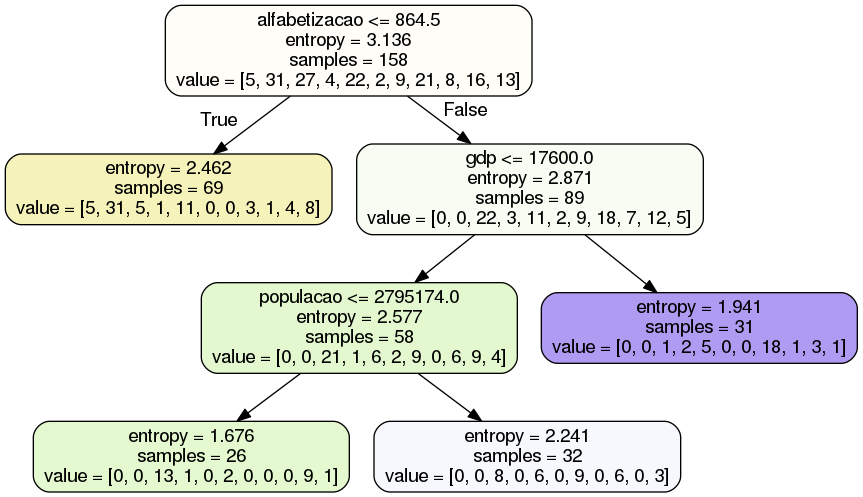

In [1218]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

lista_regiao = list(country_df.columns[1:])
lista_regiao.pop(11)
mostra_grafo(arvore_decisao, lista_regiao)